### Autor: Juan Manuel Rodríguez Gómez
### Asignatura: Estadística Multivariante (Prácticas)
### Tarea Voluntaria 1 (Glaucoma DB)

### 1. Lectura del Conjunto de Datos

**Se han eliminado en Excel los valores no numéricos de la celdas del conjunto de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura del conjunto de datos
df = pd.read_csv("C:/Users/LENOVO/Desktop/glaucoma.csv", delimiter=";", header=0)

In [3]:
# Mostramos el DataFrame
df

,OJO,TIPO_GLAUCOMA,N_IMPACTOS,CUADRANTES,ENERGIA_IMPACTO,ENERGIA_TOTAL,CIRUJIA_PREVIA,PIO_PRE_SLT,PIO_1_SEMANA,PIO_1_MES,PIO_3_MES,FARMACOS_PRE,FARMACOS_1_MES,FARMACOS_3_MES,DOLOR,SEXO,EDAD,PIO_NORMAL,PIO_NORMAL_CAT
0,0.0,0.0,112,4.0,1.5,174.0,NaN,31,0,0.0,0,3.0,0,0,0.0,NaN,0,0.0,1
1,1.0,NaN,108,4.0,1.2,128.0,1.0,29,23,19.0,24,3.0,4,4,1.0,0.0,56,19.0,0
2,0.0,1.0,123,4.0,1.1,133.0,1.0,36,30,30.0,30,1.0,4,4,1.0,0.0,56,30.0,1
3,1.0,2.0,131,4.0,1.5,191.0,1.0,14,0,21.0,14,1.0,0,0,1.0,1.0,49,21.0,0
4,0.0,2.0,156,4.0,1.2,182.0,1.0,14,0,16.0,17,1.0,0,0,1.0,1.0,49,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,16.0,102,4.0,1.4,141.0,NaN,23,0,0.0,0,1.0,0,0,NaN,NaN,0,0.0,1
117,NaN,16.0,107,4.0,1.4,149.0,NaN,26,0,0.0,0,0.0,0,0,NaN,NaN,0,0.0,1
118,1.0,1.0,140,4.0,NaN,211.0,NaN,21,0,0.0,0,2.0,0,0,NaN,NaN,0,0.0,1
119,0.0,1.0,198,45019.0,NaN,235.0,NaN,17,0,0.0,0,0.0,0,0,NaN,NaN,0,0.0,1


In [4]:
# Breve información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OJO              117 non-null    float64
 1   TIPO_GLAUCOMA    119 non-null    float64
 2   N_IMPACTOS       121 non-null    int64  
 3   CUADRANTES       118 non-null    float64
 4   ENERGIA_IMPACTO  107 non-null    float64
 5   ENERGIA_TOTAL    121 non-null    float64
 6   CIRUJIA_PREVIA   85 non-null     float64
 7   PIO_PRE_SLT      121 non-null    int64  
 8   PIO_1_SEMANA     121 non-null    int64  
 9   PIO_1_MES        116 non-null    float64
 10  PIO_3_MES        121 non-null    int64  
 11  FARMACOS_PRE     117 non-null    float64
 12  FARMACOS_1_MES   121 non-null    int64  
 13  FARMACOS_3_MES   121 non-null    int64  
 14  DOLOR            61 non-null     float64
 15  SEXO             60 non-null     float64
 16  EDAD             121 non-null    int64  
 17  PIO_NORMAL      

### 2. Reemplazamiento de Valores Nulos del Conjunto de Datos

**Vamos a sustituir los valores nulos por la mediana de la columna correspondiente**

In [5]:
# Vemos las filas del DataFrame que contienen valores nulos
df.isna().any()

OJO                 True
TIPO_GLAUCOMA       True
N_IMPACTOS         False
CUADRANTES          True
ENERGIA_IMPACTO     True
ENERGIA_TOTAL      False
CIRUJIA_PREVIA      True
PIO_PRE_SLT        False
PIO_1_SEMANA       False
PIO_1_MES           True
PIO_3_MES          False
FARMACOS_PRE        True
FARMACOS_1_MES     False
FARMACOS_3_MES     False
DOLOR               True
SEXO                True
EDAD               False
PIO_NORMAL          True
PIO_NORMAL_CAT     False
dtype: bool

In [6]:
# Seleccionamos las filas con valores nulos
filas_valores_nulos = df[df.isnull().any(axis=1)]
filas_valores_nulos

,OJO,TIPO_GLAUCOMA,N_IMPACTOS,CUADRANTES,ENERGIA_IMPACTO,ENERGIA_TOTAL,CIRUJIA_PREVIA,PIO_PRE_SLT,PIO_1_SEMANA,PIO_1_MES,PIO_3_MES,FARMACOS_PRE,FARMACOS_1_MES,FARMACOS_3_MES,DOLOR,SEXO,EDAD,PIO_NORMAL,PIO_NORMAL_CAT
0,0.0,0.0,112,4.0,1.5,174.0,NaN,31,0,0.0,0,3.0,0,0,0.0,NaN,0,0.0,1
1,1.0,NaN,108,4.0,1.2,128.0,1.0,29,23,19.0,24,3.0,4,4,1.0,0.0,56,19.0,0
21,1.0,1.0,135,4.0,1.2,161.0,NaN,12,14,11.0,0,4.0,4,0,1.0,0.0,53,11.0,1
22,0.0,1.0,98,4.0,1.2,124.0,NaN,12,13,11.0,0,4.0,4,0,1.0,0.0,53,11.0,1
25,0.0,1.0,0,0.0,0.0,0.0,NaN,0,0,0.0,0,0.0,0,0,NaN,NaN,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,16.0,102,4.0,1.4,141.0,NaN,23,0,0.0,0,1.0,0,0,NaN,NaN,0,0.0,1
117,NaN,16.0,107,4.0,1.4,149.0,NaN,26,0,0.0,0,0.0,0,0,NaN,NaN,0,0.0,1
118,1.0,1.0,140,4.0,NaN,211.0,NaN,21,0,0.0,0,2.0,0,0,NaN,NaN,0,0.0,1
119,0.0,1.0,198,45019.0,NaN,235.0,NaN,17,0,0.0,0,0.0,0,0,NaN,NaN,0,0.0,1


In [7]:
# Copiamos el conjunto de datos para no alterar el original
df_copy = df.copy()

In [8]:
# Rellenamos los valores nulos de cada columna con con la mediana correspondiente
# de cada atributo usando la clase Imputer de Sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [9]:
# Se le proporcionan los atributos numéricos (en este caso, todos los atributos del dataframe son numéricos, pero 
# hay que tener cuidado ya que la clase imputer no admite valores categoricos, solo valores numéricos)
# para que calcule los valores
imputer.fit(df_copy)

SimpleImputer(strategy='median')

In [10]:
# Rellenamos los valores nulos
df_copy_nonan = imputer.transform(df_copy)

In [11]:
# Transformamos el resultado a un DataFrame de Pandas
df_copy = pd.DataFrame(df_copy_nonan, columns=df.columns)

In [12]:
df_copy.head(10)

,OJO,TIPO_GLAUCOMA,N_IMPACTOS,CUADRANTES,ENERGIA_IMPACTO,ENERGIA_TOTAL,CIRUJIA_PREVIA,PIO_PRE_SLT,PIO_1_SEMANA,PIO_1_MES,PIO_3_MES,FARMACOS_PRE,FARMACOS_1_MES,FARMACOS_3_MES,DOLOR,SEXO,EDAD,PIO_NORMAL,PIO_NORMAL_CAT
0,0.0,0.0,112.0,4.0,1.5,174.0,1.0,31.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,4.0,108.0,4.0,1.2,128.0,1.0,29.0,23.0,19.0,24.0,3.0,4.0,4.0,1.0,0.0,56.0,19.0,0.0
2,0.0,1.0,123.0,4.0,1.1,133.0,1.0,36.0,30.0,30.0,30.0,1.0,4.0,4.0,1.0,0.0,56.0,30.0,1.0
3,1.0,2.0,131.0,4.0,1.5,191.0,1.0,14.0,0.0,21.0,14.0,1.0,0.0,0.0,1.0,1.0,49.0,21.0,0.0
4,0.0,2.0,156.0,4.0,1.2,182.0,1.0,14.0,0.0,16.0,17.0,1.0,0.0,0.0,1.0,1.0,49.0,16.0,0.0
5,1.0,1.0,125.0,4.0,1.4,170.0,0.0,30.0,0.0,18.0,20.0,2.0,3.0,3.0,1.0,1.0,74.0,18.0,0.0
6,0.0,1.0,178.0,4.0,1.4,249.0,0.0,36.0,0.0,20.0,19.0,2.0,3.0,3.0,1.0,1.0,74.0,20.0,0.0
7,0.0,3.0,164.0,4.0,1.9,301.0,0.0,25.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,65.0,18.0,0.0
8,0.0,1.0,109.0,4.0,1.0,109.0,1.0,23.0,0.0,10.0,16.0,2.0,2.0,2.0,0.0,1.0,60.0,10.0,1.0
9,1.0,1.0,116.0,4.0,2.2,238.0,0.0,22.0,22.0,20.0,20.0,0.0,0.0,0.0,1.0,0.0,82.0,20.0,0.0


In [13]:
# Comprobamos que el DataFrame ya no tiene valores nulos
df_copy.isna().any()

OJO                False
TIPO_GLAUCOMA      False
N_IMPACTOS         False
CUADRANTES         False
ENERGIA_IMPACTO    False
ENERGIA_TOTAL      False
CIRUJIA_PREVIA     False
PIO_PRE_SLT        False
PIO_1_SEMANA       False
PIO_1_MES          False
PIO_3_MES          False
FARMACOS_PRE       False
FARMACOS_1_MES     False
FARMACOS_3_MES     False
DOLOR              False
SEXO               False
EDAD               False
PIO_NORMAL         False
PIO_NORMAL_CAT     False
dtype: bool

### 3. Reemplazamiento de Valores Atípicos del Conjunto de Datos

**Usamos el método intercuartílico (IQR) para detectar los outliers del dataframe**

In [14]:
def detectar_outliers(df):
    """
    Detecta y devuelve los valores atípicos en cada columna de un DataFrame utilizando el método IQR.
    """
    outliers_dict = {}

    for columna in df.columns:
        # Calcular el IQR (rango intercuartílico) para la columna actual
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Calcular los límites para identificar outliers en la columna actual
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar los valores atípicos en la columna actual
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]

        # Almacenar los valores atípicos en el diccionario de resultados
        outliers_dict[columna] = outliers

    return outliers_dict

In [15]:
outliers_df_copy = detectar_outliers(df_copy)
print(outliers_df_copy)

{'OJO': Series([], Name: OJO, dtype: float64), 'TIPO_GLAUCOMA': 89     14.0
103    15.0
104    15.0
105    15.0
111    16.0
112    16.0
113    16.0
114    16.0
115    16.0
116    16.0
117    16.0
Name: TIPO_GLAUCOMA, dtype: float64, 'N_IMPACTOS': 14     246.0
24     202.0
25       0.0
68     246.0
101      0.0
119    198.0
Name: N_IMPACTOS, dtype: float64, 'CUADRANTES': 20         3.0
25         0.0
26         3.5
29         3.5
32         3.0
33         3.0
35         3.0
37         3.0
83         2.0
90         3.0
91         3.0
92         3.0
93         3.0
101        0.0
119    45019.0
Name: CUADRANTES, dtype: float64, 'ENERGIA_IMPACTO': 25    0.0
75    2.4
Name: ENERGIA_IMPACTO, dtype: float64, 'ENERGIA_TOTAL': 7      301.0
14     307.0
17     312.0
19     326.0
24     388.0
25       0.0
68     307.0
71       0.0
74       0.0
101      0.0
Name: ENERGIA_TOTAL, dtype: float64, 'CIRUJIA_PREVIA': 5     0.0
6     0.0
7     0.0
9     0.0
10    0.0
14    0.0
18    0.0
20    0.0
35    0.

**El outlier más a destacar es el de la fila 119 de la columna "CUADRANTES", luego, solo vamos a sustituir dicho outlier por la mediana de la columna correspondiente**

In [16]:
df_copy.at[119, "CUADRANTES"] = df_copy["CUADRANTES"].median()

In [17]:
df_copy

,OJO,TIPO_GLAUCOMA,N_IMPACTOS,CUADRANTES,ENERGIA_IMPACTO,ENERGIA_TOTAL,CIRUJIA_PREVIA,PIO_PRE_SLT,PIO_1_SEMANA,PIO_1_MES,PIO_3_MES,FARMACOS_PRE,FARMACOS_1_MES,FARMACOS_3_MES,DOLOR,SEXO,EDAD,PIO_NORMAL,PIO_NORMAL_CAT
0,0.0,0.0,112.0,4.0,1.5,174.0,1.0,31.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,4.0,108.0,4.0,1.2,128.0,1.0,29.0,23.0,19.0,24.0,3.0,4.0,4.0,1.0,0.0,56.0,19.0,0.0
2,0.0,1.0,123.0,4.0,1.1,133.0,1.0,36.0,30.0,30.0,30.0,1.0,4.0,4.0,1.0,0.0,56.0,30.0,1.0
3,1.0,2.0,131.0,4.0,1.5,191.0,1.0,14.0,0.0,21.0,14.0,1.0,0.0,0.0,1.0,1.0,49.0,21.0,0.0
4,0.0,2.0,156.0,4.0,1.2,182.0,1.0,14.0,0.0,16.0,17.0,1.0,0.0,0.0,1.0,1.0,49.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0,16.0,102.0,4.0,1.4,141.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
117,0.0,16.0,107.0,4.0,1.4,149.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
118,1.0,1.0,140.0,4.0,1.5,211.0,1.0,21.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
119,0.0,1.0,198.0,4.0,1.5,235.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### 4. Matriz de Correlación

**Una vez tratados todos los datos del dataframe, visualizamos su matriz de correlación para poder sacar alguna conclusión**

In [18]:
# Matriz de Correlación
matriz_corr = df_copy.corr()

matriz_corr

,OJO,TIPO_GLAUCOMA,N_IMPACTOS,CUADRANTES,ENERGIA_IMPACTO,ENERGIA_TOTAL,CIRUJIA_PREVIA,PIO_PRE_SLT,PIO_1_SEMANA,PIO_1_MES,PIO_3_MES,FARMACOS_PRE,FARMACOS_1_MES,FARMACOS_3_MES,DOLOR,SEXO,EDAD,PIO_NORMAL,PIO_NORMAL_CAT
OJO,1.000000,-0.167514,0.091125,0.011817,0.119807,0.061519,-0.072722,0.127733,0.071269,-0.036483,-0.014383,-0.027256,0.033726,-0.032198,0.150476,0.009994,0.005645,-0.036483,-0.115876
TIPO_GLAUCOMA,-0.167514,1.000000,-0.084669,0.146277,-0.046804,-0.050582,0.194776,-0.127291,-0.095710,-0.260416,-0.267442,-0.076669,-0.334635,-0.267179,0.124673,0.291284,-0.383580,-0.260416,0.181156
N_IMPACTOS,0.091125,-0.084669,1.000000,0.489310,0.294747,0.719566,-0.259216,0.200045,-0.006277,0.157316,0.236205,0.049481,0.112346,0.122463,-0.035937,-0.047523,0.142094,0.157316,-0.150884
CUADRANTES,0.011817,0.146277,0.489310,1.000000,0.218216,0.416060,0.030013,0.131072,0.086378,0.084690,0.042076,-0.009880,0.045985,-0.003316,-0.044630,-0.010138,0.101568,0.084690,-0.106993
ENERGIA_IMPACTO,0.119807,-0.046804,0.294747,0.218216,1.000000,0.623847,-0.259178,0.205444,0.071358,0.085472,0.080678,0.115466,-0.051138,-0.122274,0.024400,-0.084614,0.079057,0.085472,-0.101655
ENERGIA_TOTAL,0.061519,-0.050582,0.719566,0.416060,0.623847,1.000000,-0.235751,0.204123,0.062095,0.155687,0.151153,0.115815,0.016898,-0.046931,-0.053863,0.012506,0.114027,0.155687,-0.196440
CIRUJIA_PREVIA,-0.072722,0.194776,-0.259216,0.030013,-0.259178,-0.235751,1.000000,-0.204823,-0.062799,-0.336719,-0.401157,-0.249314,-0.397909,-0.303160,0.108485,0.251098,-0.331514,-0.336719,0.273627
PIO_PRE_SLT,0.127733,-0.127291,0.200045,0.131072,0.205444,0.204123,-0.204823,1.000000,0.166867,0.329483,0.361240,-0.041010,0.218931,0.311207,-0.085066,-0.080761,0.236717,0.329483,-0.178382
PIO_1_SEMANA,0.071269,-0.095710,-0.006277,0.086378,0.071358,0.062095,-0.062799,0.166867,1.000000,0.645000,0.401204,0.222228,0.459330,0.261183,0.176953,-0.377146,0.455598,0.645000,-0.373689
PIO_1_MES,-0.036483,-0.260416,0.157316,0.084690,0.085472,0.155687,-0.336719,0.329483,0.645000,1.000000,0.655155,0.213929,0.557144,0.457294,0.008433,-0.523678,0.779466,1.000000,-0.662403


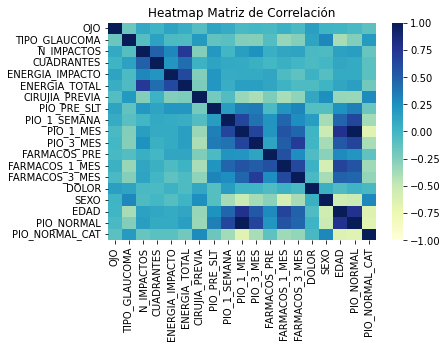

In [19]:
# Mapa de Calor de la Matriz de Correlación

sns.heatmap(matriz_corr, cmap="YlGnBu", vmax=1, vmin=-1)
plt.title('Heatmap Matriz de Correlación')
plt.show()

### 5. Análisis de la Matriz de Correlación

**Podemos observar cierta relación entre "N_IMPACTOS", "CUADRANTES", "ENERGIA_IMPACTO" y "ENERGIA_TOTAL", lo cual es totalmente lógico teniendo en cuenta lo que representa cada una de estas variables**


**Vamos a centrarnos en las correlaciones de una variable que parece ser interesante en vista del heatmap: "EDAD"**

In [20]:
# Correlaciones de la columna "EDAD" ordenadas de mayor a menor
correlaciones_edad = matriz_corr["EDAD"].sort_values(ascending=False)

# Obtener las 5 columnas más relacionadas con la columna "EDAD" (excluyendo la propia columna "EDAD")
mayores_correlaciones_edad = correlaciones_edad.index[1:6]

print(mayores_correlaciones_edad)

Index(['PIO_1_MES', 'PIO_NORMAL', 'FARMACOS_1_MES', 'PIO_3_MES',
       'FARMACOS_3_MES'],
      dtype='object')


In [21]:
df_copy[["EDAD", "PIO_1_MES", "PIO_3_MES", "FARMACOS_1_MES", "FARMACOS_3_MES","PIO_NORMAL"]].head(10)

,EDAD,PIO_1_MES,PIO_3_MES,FARMACOS_1_MES,FARMACOS_3_MES,PIO_NORMAL
0,0.0,0.0,0.0,0.0,0.0,0.0
1,56.0,19.0,24.0,4.0,4.0,19.0
2,56.0,30.0,30.0,4.0,4.0,30.0
3,49.0,21.0,14.0,0.0,0.0,21.0
4,49.0,16.0,17.0,0.0,0.0,16.0
5,74.0,18.0,20.0,3.0,3.0,18.0
6,74.0,20.0,19.0,3.0,3.0,20.0
7,65.0,18.0,0.0,0.0,0.0,18.0
8,60.0,10.0,16.0,2.0,2.0,10.0
9,82.0,20.0,20.0,0.0,0.0,20.0


In [22]:
num_filas_edad_mayor_40 = len(df_copy[df_copy['EDAD'] > 40])

print("Número de filas con EDAD mayor a 40 años:", num_filas_edad_mayor_40)

Número de filas con EDAD mayor a 40 años: 55


In [23]:
num_filas_edad_igual_0 = len(df_copy[df_copy['EDAD'] == 0])

print("Número de filas con EDAD igual a 0 años:", num_filas_edad_igual_0)

Número de filas con EDAD igual a 0 años: 61


In [24]:
contador_filas_aumento_pio = (df_copy["PIO_1_MES"] - df_copy["PIO_3_MES"] < 0).sum() 

print("Número de personas cuya PIO ha aumentado del 1 Mes al 3 Mes:", contador_filas_aumento_pio)

Número de personas cuya PIO ha aumentado del 1 Mes al 3 Mes: 12


In [25]:
edades_aumento_pio = df_copy.loc[(df_copy["PIO_1_MES"] - df_copy["PIO_3_MES"] < 0), "EDAD"]

print("Edades de las personas cuya PIO ha aumentado del 1 Mes al 3 Mes:")
print(edades_aumento_pio)

Edades de las personas cuya PIO ha aumentado del 1 Mes al 3 Mes:
1     56.0
4     49.0
5     74.0
8     60.0
18    64.0
24    35.0
30    60.0
45    49.0
46    49.0
52    59.0
55    25.0
56    25.0
Name: EDAD, dtype: float64


In [26]:
contador_filas_aumento_farmacos = (df_copy["FARMACOS_1_MES"] - df_copy["FARMACOS_3_MES"] < 0).sum() 
contador_filas_igual_farmacos = (df_copy["FARMACOS_1_MES"] - df_copy["FARMACOS_3_MES"] == 0).sum() 

print("Número de personas cuya ingesta de fármacos ha aumentado del 1 Mes al 3 Mes tras la operación:", 
      contador_filas_aumento_farmacos)
print("Número de personas cuya ingesta de fármacos se ha mantenido del 1 Mes al 3 Mes tras la operación:", 
      contador_filas_igual_farmacos)

Número de personas cuya ingesta de fármacos ha aumentado del 1 Mes al 3 Mes tras la operación: 1
Número de personas cuya ingesta de fármacos se ha mantenido del 1 Mes al 3 Mes tras la operación: 94


In [27]:
edad_aumento_farmacos = df_copy.loc[(df_copy["FARMACOS_1_MES"] - df_copy["FARMACOS_3_MES"] < 0), "EDAD"]

print("Número de personas cuya ingesta de fármacos ha aumentado del 1 Mes al 3 Mes tras la operación:")
print(edad_aumento_farmacos)

Número de personas cuya ingesta de fármacos ha aumentado del 1 Mes al 3 Mes tras la operación:
31    64.0
Name: EDAD, dtype: float64


In [28]:
df.iloc[31]

OJO                 0.0
TIPO_GLAUCOMA       1.0
N_IMPACTOS         97.0
CUADRANTES          4.0
ENERGIA_IMPACTO     1.1
ENERGIA_TOTAL      99.0
CIRUJIA_PREVIA      1.0
PIO_PRE_SLT        25.0
PIO_1_SEMANA       22.0
PIO_1_MES          26.0
PIO_3_MES          19.0
FARMACOS_PRE        2.0
FARMACOS_1_MES      1.0
FARMACOS_3_MES      2.0
DOLOR               1.0
SEXO                0.0
EDAD               64.0
PIO_NORMAL         26.0
PIO_NORMAL_CAT      1.0
Name: 31, dtype: float64

### 6. Conclusiones 

**- Hay una gran relación positiva (mayor que 0) entre las variables "N_IMPACTOS", "CUADRANTES", "ENERGIA_IMPACTO" y "ENERGIA_TOTAL", lo cual es totalmente lógico teniendo en cuenta lo que representa cada una de estas variables.**

**- Un 45.4% de la muestra son personas mayores de 40 años y un 50.4% son personas con 0 años (suponemos que se tratan de bebés   recién nacidos).**

**- Hay 12 personas cuya presión intraocular ha aumentado del primer mes al tercer mes tras la operación. De esas 12 personas, 9 de ellas son mayores de 40 años, 2 de ellas tienen 25 años y el restante tiene 35 años.**

**- Hay 94 personas (77.7%) de la muestra que no han tenido que aumentar su ingesta de fármacos del primer al tercer mes tras la operación.**

**- Solo hay una persona que ha tenido que aumentar su ingesta de fármacos del primer al tercer mes tras la operación, pasando de tomar 1 fármaco a tomar 2, y dicha persona tiene 64 años.**